In [2]:
# Beckham Carver
# 5/22/2024 <-- yes it's that late : ^)
# Warmup Excercise
# COSC 4557

# Sources:
- https://developers.redhat.com/articles/2021/05/21/introduction-machine-learning-jupyter-notebooks#using_a_jupyter_notebook_for_machine_learning
- https://machinelearningmodels.org/predicting-categorical-variables-with-linear-regression/
- https://saturncloud.io/blog/linear-regression-with-sklearn-using-categorical-variables/
- https://stackoverflow.com/questions/60769583/how-to-round-predictions
- https://stackoverflow.com/questions/40045632/adding-a-column-in-pandas-df-using-a-function
- Worked together with Michael Stoll, I read through the redhat article, and then referenced Mwolf's existing submission, I recommended Mwolf's submission to Michael.

# __
Pandas/numpy/matplotlib all felt similar to R, which I have worked in before for Design & Analysis Stats. I didn't (and do not yet) have these libraries functions commited to memory yet, but generally I know what I want to do, and then have to search for the function that does it. Or in some cases just use regular python to do what close to what I need, i.e. (.apply(lambda x: x / 10)) when I wanted to squeeze the data so my Y-axis would  work better with the data set.

In [3]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

df = pd.read_csv('./wine+quality/winequality-red.csv', sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# __
At first look I see a few opportunities to clean the data, my ideal goal would be for each column a similar range of values (i.e. roughly between 1-10). This marks the sulfur dioxide columns as problematic as their values exceed the range, with a maxes of 72 & 289 and means of 14 & 43. Chlorides, volatile acidity, citric acid, and sulfates all have means fall below the desired range, with some outliers in their maxes. Luckily they're not in the first 100 so I'll ignore that for now. Density is a tough one because the values are so close together, my initial idea is to remove ~0.99 and scale up the remainder as the min >0.99.

<Axes: >

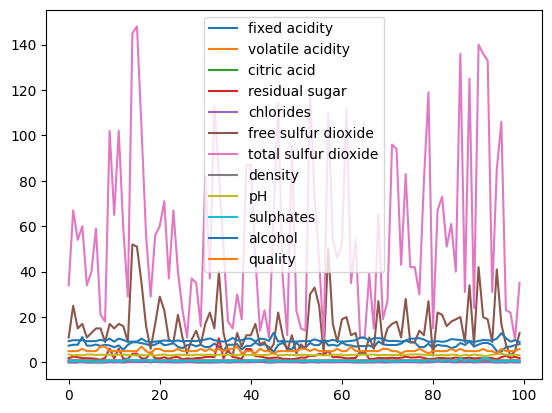

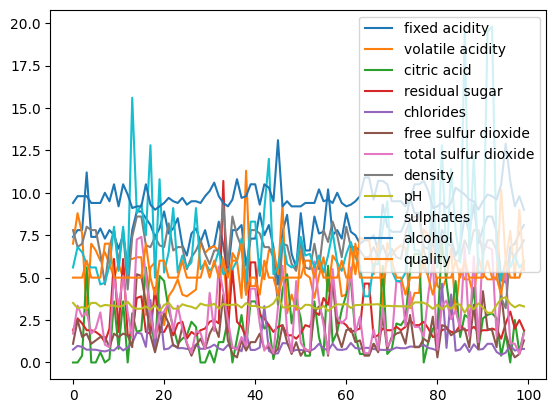

In [5]:
df.head(100).plot()
df_hr = df

# Exceeds desired range
df_hr.loc[:,('total sulfur dioxide')] = df['total sulfur dioxide'].apply(lambda x: x / 20)
df_hr.loc[:,('free sulfur dioxide')] = df['free sulfur dioxide'].apply(lambda x: x / 10)

# Below desired range
df_hr.loc[:,('volatile acidity')] = df['volatile acidity'].apply(lambda x: x * 10)
df_hr.loc[:,('citric acid')] = df['citric acid'].apply(lambda x: x * 10)
df_hr.loc[:,('sulphates')] = df['sulphates'].apply(lambda x: x * 10)
df_hr.loc[:,('chlorides')] = df['chlorides'].apply(lambda x: x * 10)

# Subtract and scale
df_hr.loc[:,('density')] = df['density'].apply(lambda x: 1000*(x-0.99))

df_hr.head(100).plot()

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

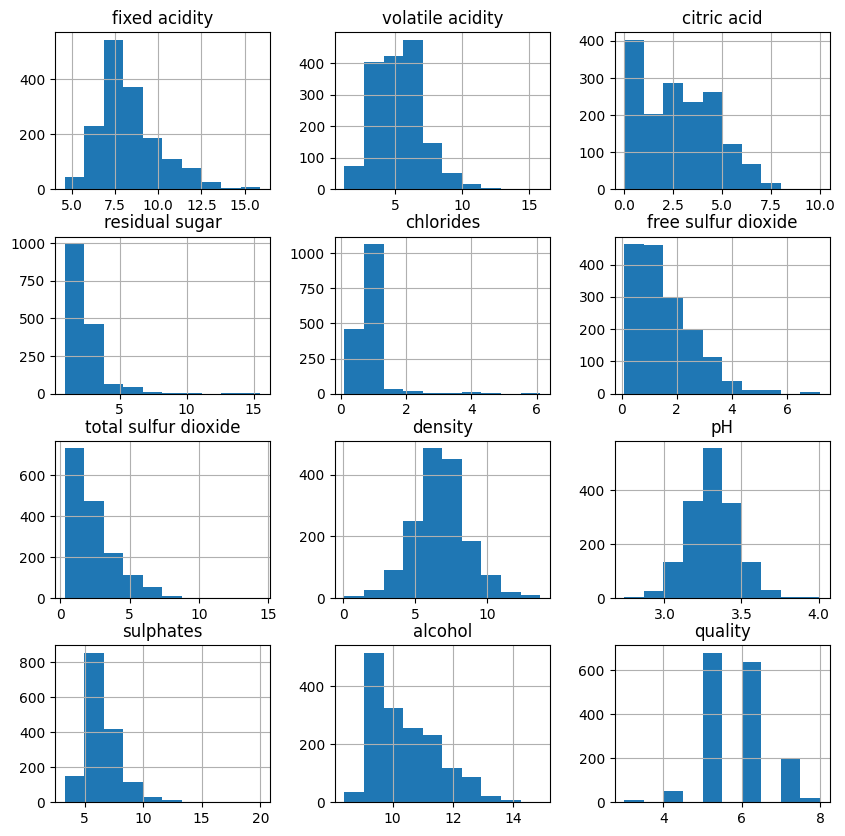

In [6]:
df_hr.hist(figsize=(10,10))

# __
Looking at the graphs and histogram, my basic guess is to keep the columns that have a bell-curve(ish) distribution. This would omit total sulfur dioxide, chlorides, citric acid, residual sugar, and alcohol. Again purely off intuition I think alcohol and residual sugar could be important in the regression- but only in how they relate to eachother. So I will create a new column for sugar to alcohol ratio, I know there are better ways to pair related variables- and that sklearn linear regression probably already optimizes for all variables combinations- but this will do for a warmup.

In [7]:
# Add sugar/alcohol ratio column.
df_hr.loc[:,('sugar / alcohol')] = df_hr.apply(lambda x: 10*(x['residual sugar'] / x['alcohol']), axis=1)

feature_x = df_hr.drop(columns=['quality', 'total sulfur dioxide', 'chlorides', 'citric acid', 'residual sugar', 'alcohol'])
target_y = df_hr["quality"]

feature_x.describe()

,fixed acidity,volatile acidity,free sulfur dioxide,density,pH,sulphates,sugar / alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,5.278205,1.587492,6.746679,3.311113,6.581488,2.455029
std,1.741096,1.790597,1.046016,1.887334,0.154386,1.695070,1.424819
min,4.600000,1.200000,0.100000,0.070000,2.740000,3.300000,0.708661
25%,7.100000,3.900000,0.700000,5.600000,3.210000,5.500000,1.830645
50%,7.900000,5.200000,1.400000,6.750000,3.310000,6.200000,2.111111
75%,9.200000,6.400000,2.100000,7.835000,3.400000,7.300000,2.548095
max,15.900000,15.800000,7.200000,13.690000,4.010000,20.000000,17.111111


In [8]:
from sklearn.model_selection import train_test_split

# split training/test sets
X_train, X_test, y_train, y_test = train_test_split(feature_x, target_y, test_size=0.33, random_state=237)
print("Training samples {},\tanomoly {:.2f}".format(X_train.shape[0], 100*(y_train == 1).mean()))
print("Testing samples {},\tanomoly {:.2f}".format( X_test.shape[0], 100*(y_test == 1).mean()))

Training samples 1071,	anomoly 0.00
Testing samples 528,	anomoly 0.00


In [9]:
from sklearn import linear_model

print('Linear Regression:')
rl = linear_model.LinearRegression()
rl.fit(feature_x, target_y)
for key, value in dict(zip(feature_x.columns, rl.coef_)).items(): print(f"{key.ljust(20)} : {value}")
yl_predict = rl.predict(X_test)
print("MSE {:.2f}".format(sklearn.metrics.mean_squared_error(y_test, yl_predict)))
print("R^2 {:.2f}".format(sklearn.metrics.r2_score(y_test, yl_predict)))

Linear Regression:
fixed acidity        : 0.23107101230105925
volatile acidity     : -0.11426425140157775
free sulfur dioxide  : -0.036280189910257735
density              : -0.22313712653650739
pH                   : 1.185811017172266
sulphates            : 0.10481111889450338
sugar / alcohol      : 0.08372970485240261
MSE 0.41
R^2 0.32


In [10]:

print('Bayesian Ridge:')
rb = linear_model.BayesianRidge()
rb.fit(feature_x, target_y)
for key, value in dict(zip(feature_x.columns, rb.coef_)).items(): print(f"{key.ljust(20)} : {value}")
yb_predict = rb.predict(X_test)
print("MSE {:.2f}".format(sklearn.metrics.mean_squared_error(y_test, yb_predict)))
print("R^2 {:.2f}".format(sklearn.metrics.r2_score(y_test, yb_predict)))

Bayesian Ridge:
fixed acidity        : 0.21895245722320691
volatile acidity     : -0.11447319604542502
free sulfur dioxide  : -0.03670948376540758
density              : -0.2188273917899492
pH                   : 1.033030072498043
sulphates            : 0.10351439935989659
sugar / alcohol      : 0.08113558360719536
MSE 0.41
R^2 0.32


In [11]:
print('Lars:')
rlars = linear_model.Lars() # Hi Lars
rlars.fit(feature_x, target_y)
for key, value in dict(zip(feature_x.columns, rlars.coef_)).items(): print(f"{key.ljust(20)} : {value}")
ylars_predict = rlars.predict(X_test) # why lars?
print("Linear Regression MSE {:.2f}".format(sklearn.metrics.mean_squared_error(y_test, ylars_predict)))
print("Linear Regression R^2 {:.2f}".format(sklearn.metrics.r2_score(y_test, ylars_predict)))

x_ph = X_test['pH']
plt.scatter(x_ph, y_test, color='orange')
plt.scatter(x_ph, ylars_predict, color='blue')
plt.ylabel('Quality')

Lars:
fixed acidity        : 0.23107101230105864
volatile acidity     : -0.11426425140157756
free sulfur dioxide  : -0.036280189910257485
density              : -0.22313712653650716
pH                   : 1.1858110171722636
sulphates            : 0.10481111889450334
sugar / alcohol      : 0.08372970485240251
Linear Regression MSE 0.41
Linear Regression R^2 0.32


# __
With all models getting an MSE of 0.41 and R^2 of 0.32 these linear models are not accurate and produced practically identical results when using every variable, so the best-case scenario is that I was correct that the columns I dropped were pointless. When using a reduced selection of inputs they do get differing results with Baysian tending to be the better of them but only slightly.

# __
Ah, the quality is a categorical value, not a numeric one. Time for me to figure out how to make the model categorical.

Lasso Lars:
fixed acidity        : 0.23107101230105864
volatile acidity     : -0.11426425140157756
free sulfur dioxide  : -0.036280189910257485
density              : -0.22313712653650716
pH                   : 1.1858110171722636
sulphates            : 0.10481111889450334
sugar / alcohol      : 0.08372970485240251
Linear Regression MSE 0.47
Linear Regression R^2 0.23


Text(0, 0.5, 'Quality')

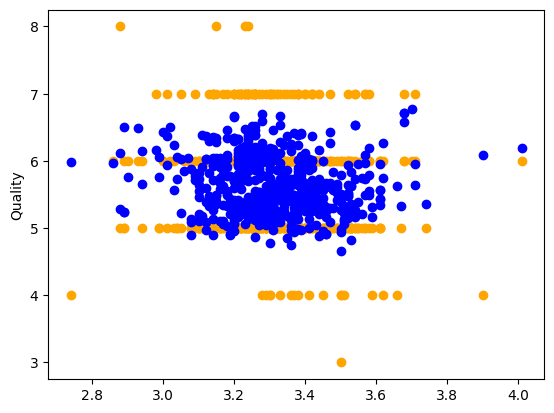

In [15]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

print('Lasso Lars:') # <- almost 'Lasso One Hot Lars Model'
lasso_rlars = linear_model.Lars()
lasso_rlars.fit(feature_x, target_y)
lass_ylars_predict = lasso.predict(X_test)

for key, value in dict(zip(feature_x.columns, lasso_rlars.coef_)).items(): print(f"{key.ljust(20)} : {value}")
print("Linear Regression MSE {:.2f}".format(sklearn.metrics.mean_squared_error(y_test, lass_ylars_predict)))
print("Linear Regression R^2 {:.2f}".format(sklearn.metrics.r2_score(y_test, lass_ylars_predict)))

x_ph = X_test['pH']
plt.scatter(x_ph, y_test, color='orange')
plt.scatter(x_ph, ylars_predict, color='blue')
plt.ylabel('Quality')

# __
Better but could still improve, maybe rounding predictions to the nearest value will help- I think this is also sort of cheating the data.

Linear Regression MSE 0.57
Linear Regression R^2 0.07


Text(0, 0.5, 'Quality')

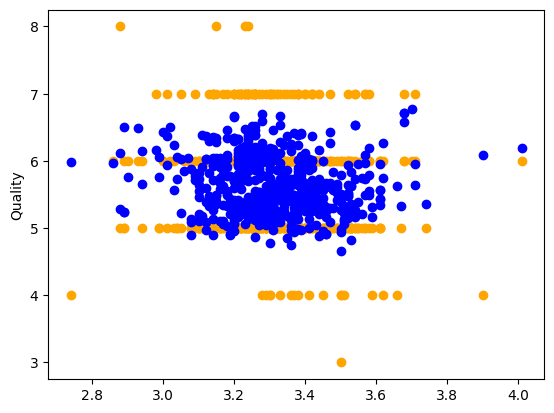

In [14]:
lass_ylars_predict = np.rint(lass_ylars_predict)

print("Linear Regression MSE {:.2f}".format(sklearn.metrics.mean_squared_error(y_test, lass_ylars_predict)))
print("Linear Regression R^2 {:.2f}".format(sklearn.metrics.r2_score(y_test, lass_ylars_predict)))

x_ph = X_test['pH']
plt.scatter(x_ph, y_test, color='orange')
plt.scatter(x_ph, ylars_predict, color='blue')
plt.ylabel('Quality')

# __
This will do. Also I accidentically committed without saving- and then quit out. Everything from the last commit was re-written, which is good practice I guess. I have no idea why it took me this long to submit especially when I had been caught up with Michael for a while.